In [1]:
# importamos las librerias necesarias
import math 
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np

In [2]:
# Initial data
H = 10 # profundidad media
B = 800 # ancho medio metros
alpha_r = 8.1
Fr0 = 0.1 #número de Froude
D50 = 0.000750 #diametro medio del material de fondo
ks = 2.5*D50 #rugosidad de fondo
C_f = (alpha_r*(H/ks)**(1/6))**(-2)# Rugosidad de Chezzy

In [3]:
#Parametros hidraulicos y gemetrico de cauces aluviales
A =(3.8*(1+B/(13.9*H)*math.exp(-13.9*H/B)))# coeficiente A

kmax = (math.sqrt(2)*C_f)/H*math.sqrt(A-1+Fr0**2) 

lambda_min = (2*math.pi)/kmax #arcwavelength
lambda_min

11063.146283238486

In [4]:
# Forma en planta de la curva tipo kinoshita
Ds = 1 #delta de distancia entre puntos
longitud = 45000 #longitud total de la señal en metros
s = list(np.arange(0, longitud, Ds)) #
theta0 = math.radians(45) # theta cero
lambda_ci = lambda_min
Js = 1/64 #estos parametros se pueden cambiar
Jf = 1/192 #estos parametros se pueden cambiar

#creamos las variables de la misma longitud que s
theta = np.zeros(len(s))
costheta = np.zeros(len(s))
sentheta = np.zeros(len(s))
X =np.zeros(len(s))
Y =np.zeros(len(s))
dist= np.zeros(len(s))
cur =np.zeros(len(s))
n = 0

#implementamos la señal y creamos una 
for i in (s):
    theta[n] = theta0 * math.sin((2*math.pi*i)/lambda_ci)+ theta0**3*(Js*math.cos(3*((2*math.pi*i)/lambda_ci))-Jf*math.sin(3*(2*math.pi*i)/lambda_ci)) 
    costheta[n] = math.cos(theta[n])
    sentheta[n] = math.sin(theta[n])
    if n==0:
        X[n]=0; Y[n]=0
        dist[n] = 0
    else:  
        X[n] = X[n-1] + (s[n]-s[n-1])*costheta[n-1] 
        Y[n] = Y[n-1] + (s[n]-s[n-1])*sentheta[n-1]  
        #determina la curvatura
        cur[n] = (theta[n]-theta[n-1])/Ds
        cur[n] = 0 if np.abs(cur[n]) < 0 else cur[n]
        #calcula distancia
        dist[n] = dist[n-1]+((X[n]-X[n-1])**2+(Y[n]-Y[n-1])**2)**0.5
    
    n+=1
    

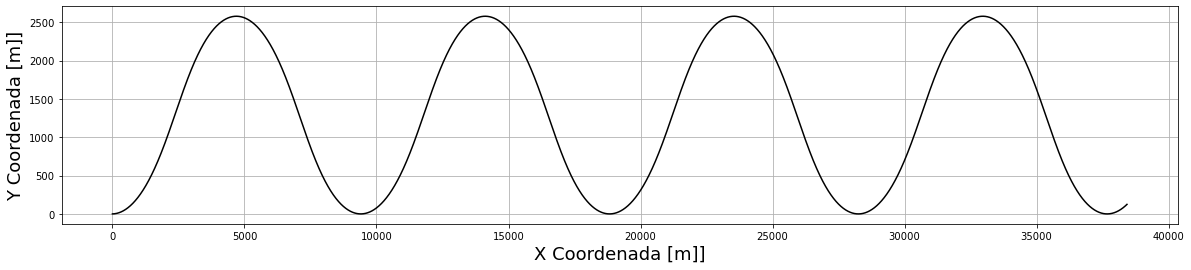

In [5]:
#ploteamos los resultados de Kinoshita
plt.figure(figsize=(20,4))

plt.plot(X, Y,'-k')
plt.xlabel("X Coordenada [m]]", size =18)
plt.ylabel("Y Coordenada [m]]", size =18)

plt.grid()
plt.show()

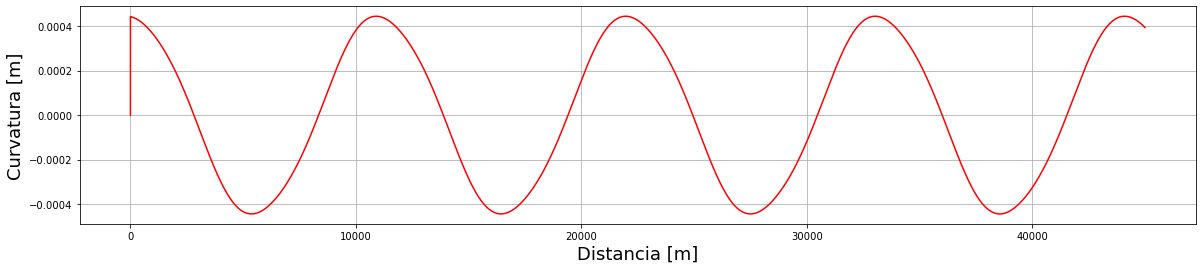

In [6]:
#ploteamos los resultados de Kinoshita
plt.figure(figsize=(20,4))

plt.plot(dist, cur,'-r')

plt.xlabel("Distancia [m]", size =18)
plt.ylabel("Curvatura [m]", size =18)

plt.grid()
plt.show()

In [7]:
#Esta celda usamos cuando tenemos que filtrar información de una linea central 
SMO = 2  # Nivel de suavizado
# Ejecutamos el code
n = SMO if SMO < 39 else int(np.around(1.1**SMO, decimals=0))
xa, xb, ya, yb = X[0], X[-1], Y[0], Y[-1]
for i in range(n):
    x = savgol_filter(X, 5, 2, mode='nearest')
    y = savgol_filter(Y, 5, 2, mode='nearest')
    x[0], x[-1], y[0], y[-1] = xa, xb, ya, yb

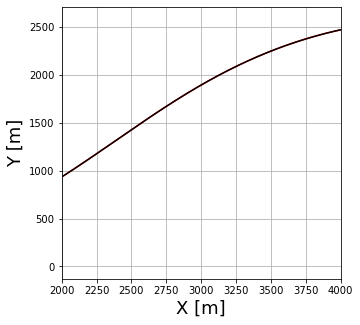

In [8]:
#comparamos la geometría generada y filtrada

plt.figure(figsize=(5,5))

plt.plot(x, y,'-r')
plt.plot(X, Y,'-k')

plt.xlim(2000,4000)
plt.xlabel("X [m]", size =18)
plt.ylabel("Y [m]", size =18)

plt.grid()
plt.show()

numero de curvas= 7
[ 2815  8347 13878 19410 24941 30473 36005 41536 44997]


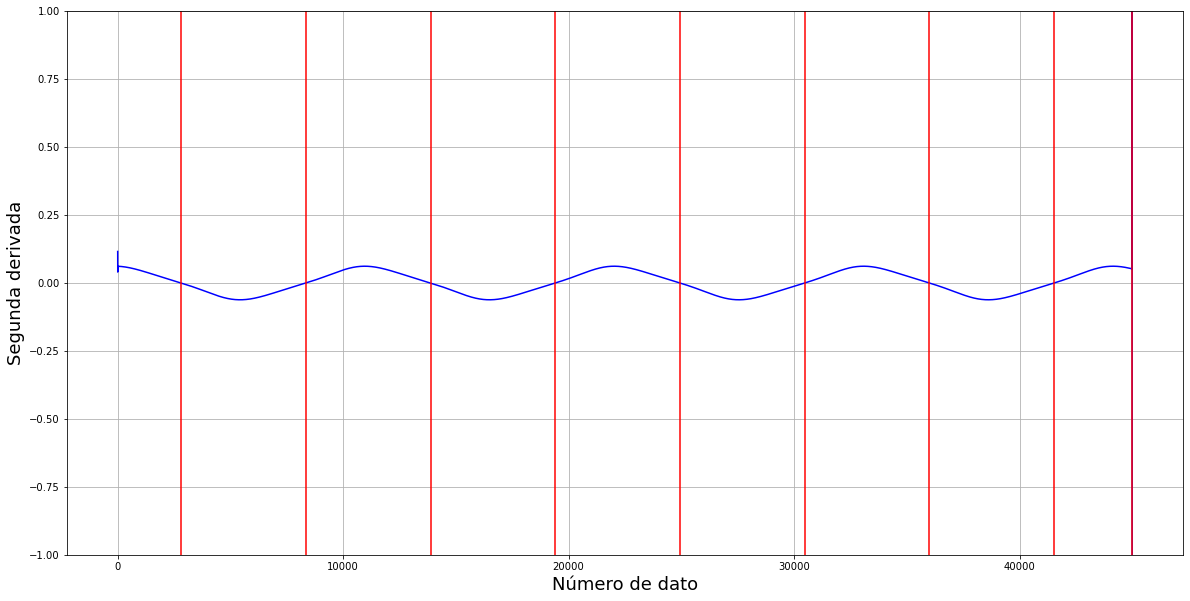

In [9]:
# Determinamos los puntos de inflexión. Determinamos cuantas curvas hay
plt.figure(figsize=(20,10))

# compute second derivative
smooth_d2 = np.gradient(np.gradient(y))

# Este code encuentra los puntos de inflección cuando la segunda derivada es cero
infls = np.where(np.diff(np.sign(smooth_d2)))[0]

# plot results
plt.plot(smooth_d2 / np.max(smooth_d2),'-b')
n = 0

plt.ylim(-1,1)

#plotemoas la lineas
for i, infl in enumerate(infls, 1):
    plt.axvline(x=infl, color='r')
    n = i 

print('numero de curvas=',n-2)
print(infls)

plt.xlabel("Número de dato", size =18)
plt.ylabel("Segunda derivada", size =18)
plt.grid()
plt.show()


In [10]:
# Determinamos los arcwavelength y wavelength 

# Generamos una variable vacía
arc_wavelength = np.zeros(len(infls[1:-1]))
wavelength = np.zeros(len(infls[1:-1]))

#Recorremos la var infls y extremos los puntos donde se dan la condición de inflección
for i, infl in enumerate(infls[1:-1]):
    arc_wavelength[i] = dist[infls[i+1]] - dist[infls[i]]
    wavelength[i] = ((X[infls[i+1]]-X[infls[i]])**2+(Y[infls[i+1]]-Y[infls[i]])**2)**0.5
    
print('longitud de onda=', 2*arc_wavelength)
print('longitud de arco=', 2*wavelength)

longitud de onda= [11064. 11062. 11064. 11062. 11064. 11064. 11062.]
longitud de arco= [9423.3258233  9421.91294079 9423.32018029 9421.90730604 9423.31455555
 9423.33101982 9421.91812972]


In [11]:
# Determinamos la sinuosidad
sinuosidad = arc_wavelength / wavelength

print(sinuosidad)

[1.17410776 1.17407156 1.17410847 1.17407226 1.17410917 1.17410712
 1.17407091]


In [12]:
#Determinamos la amplitud
### PODEMOS USAR LA SIGUIENTE LIBRERÍA Y ENCONTRAR EL PUNTO DONDE SE DESARROLLA LA MÁXIMA CURVATURA####
from scipy.optimize import curve_fit, minimize_scalar


<AxesSubplot:xlabel='X'>

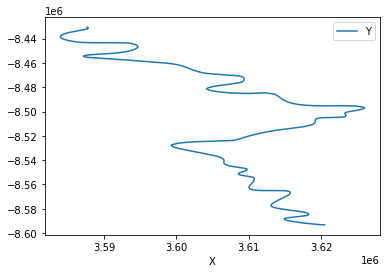

In [13]:
#Leemos datos del Ucayali
df = pd.read_fwf('data/ucayali_centerline.txt', sep=' ', header=None, names =['X','Y'])
df.plot(0,1)